In [1]:
import numpy as np
from python_tsp.exact import *
from python_tsp.heuristics import *
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Cost Matrices

In [2]:
def create_cost_matrix(n_towns):
   """Рандомная матрица с положительными элементами, 
   которая хранит длины рёбер между каждой парой городов"""

   A = np.random.random((n_towns, n_towns))
   
   for i in range(n_towns):
     A[i][i] = np.nan

   return A

In [3]:
def cost_of_permutation(cost_matrix, town_sequence):
  cost = 0.0

  for i in range(len(town_sequence)-1):
    cost += cost_matrix [town_sequence[i]] [town_sequence[i+1]]
  
  return cost

In [4]:
cost_matrix_4 = np.array([[np.nan    , 0.35271991, 0.96262685, 0.11727604],
                          [0.13505078, np.nan    , 0.63915344, 0.43149425],
                          [0.58432224, 0.83676812, np.nan    , 0.4879146 ],
                          [0.14998587, 0.45394107, 0.2140258 , np.nan    ]])

In [5]:
cost_matrix_4_2 = np.array([[    np.nan, 0.81622592, 0.20408823, 0.09008185],
                            [0.76482761,     np.nan, 0.14736744, 0.3630235 ],
                            [0.61341101, 0.77179601,     np.nan, 0.95344378],
                            [0.55374766, 0.6944981 , 0.16269875,     np.nan]])

In [6]:
cost_matrix_5 = np.array([[    np.nan, 0.76227914, 0.2634839 , 0.20971233, 0.42631259],
                          [0.44639413,     np.nan, 0.55598626, 0.92765347, 0.31959185],
                          [0.79979159, 0.73929719,     np.nan, 0.92673736, 0.14842685],
                          [0.43804313, 0.20916616, 0.2693464 ,     np.nan, 0.91146279],
                          [0.06022013, 0.70339376, 0.51852765, 0.77323457,     np.nan]])

In [7]:
cost_matrix_6 = \
np.array([[    np.nan, 0.00165482, 0.72520661, 0.4163876 , 0.03288493, 0.54206491],
          [0.74621655,     np.nan, 0.37808992, 0.95303594, 0.17005047, 0.61706156],
          [0.01730168, 0.42465019,     np.nan, 0.34035056, 0.9397413 , 0.06493504],
          [0.2761505 , 0.66518233, 0.42480788,     np.nan, 0.11856712, 0.34309329],
          [0.82796128, 0.86227791, 0.29369849, 0.0604712 ,     np.nan, 0.54814749],
          [0.56525883, 0.63791584, 0.29638851, 0.85863453, 0.75516877,     np.nan]])

In [8]:
cost_matrix_7 = np.array([
       [        np.nan, 7.79483870e-01, 2.46516516e-01, 4.14276710e-01,
        8.89571789e-01, 7.57889375e-01, 7.95729409e-01],
       [3.49235590e-02,         np.nan, 9.20405902e-01, 8.17663877e-01,
        8.03191682e-01, 5.47471940e-01, 6.82288641e-01],
       [1.55196154e-01, 7.01254285e-01,         np.nan, 3.41477772e-01,
        8.49076627e-01, 8.99204839e-01, 2.16138721e-01],
       [2.71884960e-02, 1.77042183e-01, 8.22268694e-02,         np.nan,
        2.71236904e-01, 7.49329588e-01, 5.80932252e-01],
       [6.52178051e-01, 3.04637898e-04, 7.40780993e-01, 5.46777448e-01,
                np.nan, 3.05782054e-01, 3.73227063e-01],
       [9.43146606e-01, 7.28633819e-01, 2.59561490e-01, 6.52658317e-01,
        4.36989411e-01,         np.nan, 7.15042723e-01],
       [6.49969984e-01, 2.00003228e-01, 7.31186114e-01, 8.09980875e-01,
        8.76425288e-01, 2.36328971e-01,         np.nan]])

In [9]:
cost_matrix_8 = np.array([
    [    np.nan, 0.83911204, 0.7035106 , 0.39668363, 0.46117354, 0.19510413, 0.48658963, 0.46131103],
    [0.5870892 ,     np.nan, 0.54862795, 0.74507107, 0.49289714, 0.47200892, 0.57741251, 0.62507757],
    [0.46634288, 0.91587751,     np.nan, 0.35612168, 0.42860855, 0.12815892, 0.89677141, 0.85594071],
    [0.53797555, 0.4979348 , 0.97516805,     np.nan, 0.01425964, 0.21532494, 0.3322861 , 0.0289443 ],
    [0.22634373, 0.62941811, 0.33450535, 0.86398671,     np.nan, 0.50767408, 0.72648152, 0.99268613],
    [0.41810008, 0.98537316, 0.81336165, 0.06436564, 0.58484745,     np.nan, 0.12191475, 0.81467971],
    [0.94842273, 0.44981522, 0.93452495, 0.89825261, 0.36265244, 0.36477084,     np.nan, 0.26013962],
    [0.01901475, 0.50642185, 0.91862145, 0.26389184, 0.29948766, 0.01025452, 0.32753958,     np.nan]])

In [10]:
cost_matrix_8_2 = np.array([
       [    np.nan, 0.64872847, 0.88020467, 0.78913892, 0.46785642, 0.69541255, 0.23191492, 0.85322733],
       [0.46917114,     np.nan, 0.42555454, 0.52606282, 0.19376313, 0.48851406, 0.30183166, 0.02283085],
       [0.1449283 , 0.74410943,     np.nan, 0.21722092, 0.92483096, 0.01475718, 0.08342113, 0.13317224],
       [0.08553635, 0.56252109, 0.91751235,     np.nan, 0.82967563, 0.41104149, 0.02612125, 0.10715602],
       [0.94803921, 0.04565049, 0.51695437, 0.00566878,     np.nan, 0.42112318, 0.24739168, 0.85457518],
       [0.77870455, 0.82198046, 0.7048397 , 0.29999013, 0.6317126 ,     np.nan, 0.35259626, 0.6471396 ],
       [0.51487495, 0.83665139, 0.18311281, 0.90557789, 0.18106142, 0.76075651,     np.nan, 0.54475754],
       [0.63170062, 0.12843803, 0.79344824, 0.62246307, 0.36102696, 0.83841104, 0.75254801,     np.nan]])

In [11]:
cost_matrix_9 = np.array([
       [    np.nan, 0.67730004, 0.41469005, 0.79472044, 0.18201466,
        0.46028408, 0.80285353, 0.72205716, 0.71496473],
       [0.39370189,     np.nan, 0.92559661, 0.82061891, 0.39502622,
        0.09982358, 0.48799828, 0.47965996, 0.62942811],
       [0.54912218, 0.29675661,     np.nan, 0.10840787, 0.06461134,
        0.18617408, 0.93330297, 0.96050468, 0.15551516],
       [0.57658941, 0.66653557, 0.72491664,     np.nan, 0.87755139,
        0.8373838 , 0.55504568, 0.91359404, 0.46189636],
       [0.20427693, 0.11267771, 0.99134019, 0.26771698,     np.nan,
        0.83409189, 0.04453648, 0.21849577, 0.84957441],
       [0.96956966, 0.39490577, 0.5168001 , 0.56924986, 0.01914814,
            np.nan, 0.05866781, 0.92840136, 0.84975596],
       [0.8386292 , 0.96833296, 0.84341776, 0.48349312, 0.74474585,
        0.32327426,     np.nan, 0.9752778 , 0.29314212],
       [0.96141681, 0.19493041, 0.81237712, 0.22167303, 0.38524551,
        0.3649113 , 0.66851447,     np.nan, 0.82661027],
       [0.13551012, 0.91175874, 0.18618829, 0.09654281, 0.57258329,
        0.27462785, 0.23385379, 0.594836  ,     np.nan]])

In [12]:
cost_matrix_10 = np.array([
    [       np.nan, 0.07942641, 0.99031838, 0.09895247, 0.72745531,
        0.81045902, 0.15923533, 0.61330537, 0.90258873, 0.15491793],
       [0.88407753,     np.nan, 0.06199901, 0.56877632, 0.70008972,
        0.81340743, 0.84484164, 0.92044895, 0.59612563, 0.45129374],
       [0.50613502, 0.10989179,     np.nan, 0.73065915, 0.85902533,
        0.27992034, 0.22580289, 0.40041954, 0.66807122, 0.89457109],
       [0.80156922, 0.67934361, 0.44204649,     np.nan, 0.16947546,
        0.29116308, 0.84592144, 0.96306772, 0.98000683, 0.67636839],
       [0.6794687 , 0.15517822, 0.70378366, 0.06865874,     np.nan,
        0.41927295, 0.3731578 , 0.69591233, 0.64424128, 0.04614225],
       [0.05896441, 0.85363734, 0.40025621, 0.13863461, 0.29386601,
            np.nan, 0.60606968, 0.40311522, 0.32417107, 0.3095105 ],
       [0.26764498, 0.99628721, 0.76874766, 0.44323412, 0.34564126,
        0.46406834,     np.nan, 0.18756799, 0.11153533, 0.27771632],
       [0.85918156, 0.4737215 , 0.47637782, 0.47882724, 0.45202033,
        0.40306174, 0.69005201,     np.nan, 0.09939983, 0.05238272],
       [0.4481055 , 0.89202079, 0.18795216, 0.47662974, 0.5363038 ,
        0.00846634, 0.98229673, 0.57620242,     np.nan, 0.80506734],
       [0.38888649, 0.25867673, 0.69360475, 0.56495989, 0.39199138,
        0.27841065, 0.12511922, 0.95978543, 0.44909675,     np.nan]])

In [13]:
def adjustCM(cost_matrix):
    A = cost_matrix
    A = np.r_[np.zeros((1, len(A))), A]
    A = np.c_[np.zeros(len(A)), A]
    A[0][0] = np.nan
    return A

### Моё аналитическое решение

Переберём все перестановки в лексикографическом порядке.

Будем итерироваться по номеру перестановки. Сначала переведём его в факториальную систему счисления [(factoradic)](https://en.wikipedia.org/wiki/Factorial_number_system). Полученные цифры будут совпадать с [кодом Лемера](https://en.wikipedia.org/wiki/Lehmer_code) перестановки. 

Затем по коду Лемера вычислим саму перестановку и затем её стоимость.

In [14]:
# Могут понадобиться факториалы, поэтому на всякий случай вычислим их заранее
#
# factorials[n] == n!

factorials = [1]
for i in range(30):
  # Предполагаю, что n_towns < 30
  factorials.append(factorials[i] * (i+1))

In [15]:
def factoradic_from_perm_number(perm_number : int, factoradic_array):
  """Преобразует число в факториальную систему счисления.
  Записывает полученные цифры в factoradic_array.
  Нулевая цифра в массиве - самая значимая. Последняя цифра всегда равна 0.
  Алгоритм из https://en.wikipedia.org/wiki/Factorial_number_system#Definition """

  N = perm_number
  n_towns = len(factoradic_array)
  assert N < factorials[n_towns]

  for i in range(1, len(factoradic_array) + 1):
    N, factoradic_array[-i] = divmod(N, i)
  
  return factoradic_array

In [16]:
def permutation_from_factoradic(nums : np.ndarray):
  """Перезаписывает массив nums.
  Если изначально там находилось число в факториальной системе, то потом там будет находиться перестановка.
  Города в полученной перестановке нумеруются с 0. 
  Алгоритм из https://en.wikipedia.org/wiki/Lehmer_code#Encoding_and_decoding """
  for i in range(len(nums)-2, -1, -1):
    for j in range(i+1, len(nums)):
      if(nums[j] >= nums[i]):
        nums[j] += 1
  return nums

In [17]:
def brute(cost_matrix):
  """Перебирает все возможные перестановки и запоминает их кост."""

  n_towns = len(cost_matrix)

  factoradic_array = np.ndarray(n_towns, int)

  answers_array = []

  min_cost = np.inf
  opt_perm_number = np.nan

  for perm_number in range(factorials[n_towns]):
    town_sequence = permutation_from_factoradic(
                        factoradic_from_perm_number(perm_number, factoradic_array)
                    )
    cost = cost_of_permutation(
        cost_matrix,
        town_sequence
        )

    answers_array.append(cost)

    if cost < min_cost:
      min_cost = cost
      opt_perm_number = perm_number

  answers_df = pd.DataFrame(answers_array, columns = ["cost"])
  mean = answers_df['cost'].mean()
  answers_df['cost / mean'] = answers_df['cost'] / mean

  return {"opt_perm_number": opt_perm_number,
                 "min_cost": min_cost,
                     "mean": mean,
                      "all": answers_df}

In [18]:
brute4 = brute(cost_matrix_4)
brute4_2 = brute(cost_matrix_4_2)
brute5 = brute(cost_matrix_5)
brute6 = brute(cost_matrix_6)
brute7 = brute(cost_matrix_7)
brute8 = brute(cost_matrix_8)
brute8_2 = brute(cost_matrix_8_2)
brute9 = brute(cost_matrix_9)
brute10 = brute(cost_matrix_10)

### Actual Testing

In [19]:
def extensively_test_classical_method(cost_matrix, method, iterations = 100):
    cost = np.ndarray(iterations)
    nfev = np.ndarray(iterations)
    for i in range(iterations):
        _, cost[i], nfev[i] = method(adjustCM(cost_matrix))
    df = pd.DataFrame({'cost': cost, 'nfev': nfev})
    return df

In [20]:
def calculate_statistics(testing_results, n_towns, brute_results):
    testing_results['cost / mean'] = testing_results['cost'] / brute_results['mean']
    costs = brute_results['all']['cost'].sort_values(ignore_index = True)
    testing_results['rank'] = costs.searchsorted(testing_results['cost'])
    testing_results['rank'] += np.isclose(testing_results['cost'], costs[testing_results['rank']]) # иначе иногда получается rank = 0
    testing_results['percentile_rank'] = testing_results['rank'] / factorials[n_towns]
    testing_results['nfev * pr'] = testing_results['nfev'] * testing_results['percentile_rank']
    return testing_results

In [21]:
ann10 = extensively_test_classical_method(cost_matrix_10, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann10, 10, brute10);

In [22]:
ls10 = extensively_test_classical_method(cost_matrix_10, solve_tsp_local_search, 1000)
calculate_statistics(ls10, 10, brute10);

In [23]:
qs = pd.read_csv('../CleanCalculations/simulations.csv')

In [24]:
pd.DataFrame([
    qs[qs['n_towns'] == 10][[
        'nfev', 'cost', 'cost / mean', 'percentile_rank', 'nfev * pr'
    ]].mean(),
    ann10.mean(),
    ls10.mean()
], index = ['q', 'ann', 'ls'])

,nfev,cost,cost / mean,percentile_rank,nfev * pr,rank
q,757.680,1.981970,0.440964,0.017790,3.451294,NaN
ann,1605.106,1.560861,0.347273,0.000835,1.143789,3031.854
ls,103.154,2.152984,0.479013,0.008741,0.736423,31718.610


In [25]:
pd.DataFrame([
    qs[qs['n_towns'] == 10][[
        'nfev', 'cost', 'cost / mean', 'percentile_rank', 'nfev * pr'
    ]].median(),
    ann10.median(),
    ls10.median()
], index = ['q', 'ann', 'ls'])

,nfev,cost,cost / mean,percentile_rank,nfev * pr,rank
q,660.0,1.977953,0.440071,0.000892,0.595460,NaN
ann,1448.0,1.527843,0.339927,0.000087,0.127661,316.0
ls,97.0,2.140914,0.476327,0.001830,0.173969,6639.0


In [26]:
plt.style.use("default")
sns.set_theme()
sns.set_palette('colorblind')
plt.figure(dpi = 100)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

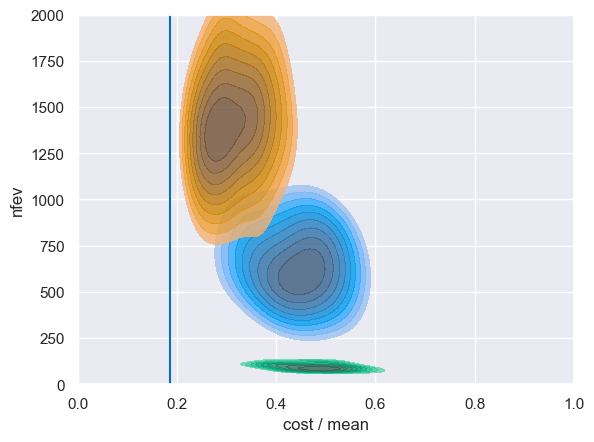

In [27]:
sns.kdeplot(data = qs[qs['n_towns'] == 10], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
sns.kdeplot(data = ann10, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
sns.kdeplot(data = ls10, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
plt.axvline(brute10['min_cost'] / brute10['mean'])
plt.savefig('./blobs.pdf', bbox_inches = 'tight')

(0.0, 2000.0)

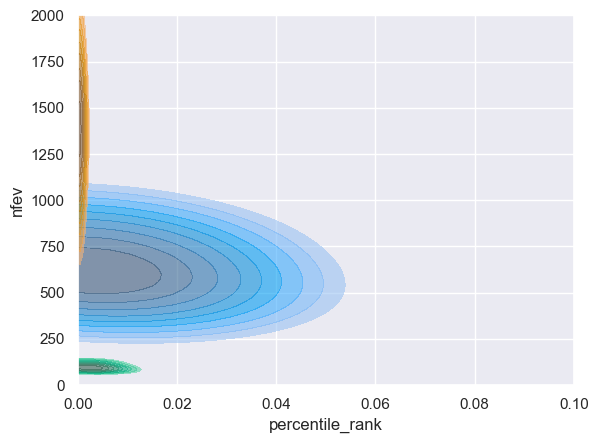

In [28]:
sns.kdeplot(data = qs[qs['n_towns'] == 10], x = 'percentile_rank', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.6)
sns.kdeplot(data = ann10, x = 'percentile_rank', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.6)
sns.kdeplot(data = ls10, x = 'percentile_rank', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.6)
plt.gca().set_xlim(0, 0.1)
plt.gca().set_ylim(0, 2000)

In [29]:
ann9 = extensively_test_classical_method(cost_matrix_9, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann9, 9, brute9);

In [30]:
ls9 = extensively_test_classical_method(cost_matrix_9, solve_tsp_local_search, 1000)
calculate_statistics(ls9, 9, brute9);

(0.0, 2000.0)

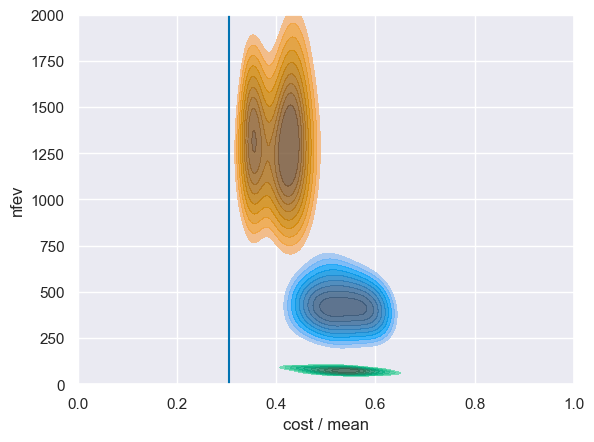

In [31]:
sns.kdeplot(data = qs[qs['n_towns'] == 9], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ann9, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ls9, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
plt.axvline(brute9['min_cost'] / brute9['mean'])
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
#plt.savefig('./blobs.pdf', bbox_inches = 'tight')

In [32]:
ann8_2 = extensively_test_classical_method(cost_matrix_8_2, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann8_2, 8, brute8);

In [33]:
ls8_2 = extensively_test_classical_method(cost_matrix_8_2, solve_tsp_local_search, 1000)
calculate_statistics(ls8_2, 8, brute8);

(0.0, 2000.0)

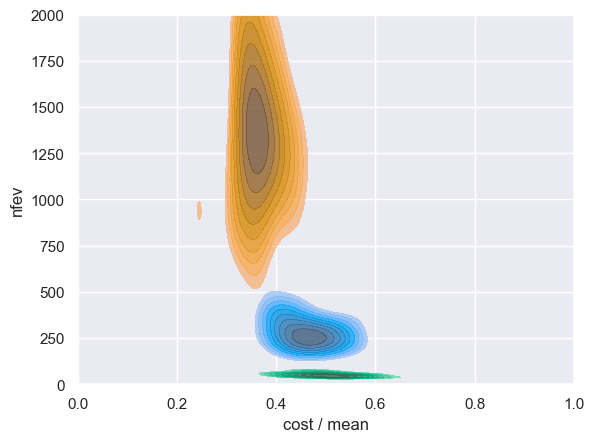

In [34]:
sns.kdeplot(data = qs[qs['n_towns'] == 8], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
sns.kdeplot(data = ann8_2, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
sns.kdeplot(data = ls8_2, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8)
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
#plt.savefig('./blobs.pdf', bbox_inches = 'tight')

In [35]:
ann7 = extensively_test_classical_method(cost_matrix_7, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann7, 7, brute7);

In [36]:
ls7 = extensively_test_classical_method(cost_matrix_7, solve_tsp_local_search, 1000)
calculate_statistics(ls7, 7, brute7);

(0.0, 2000.0)

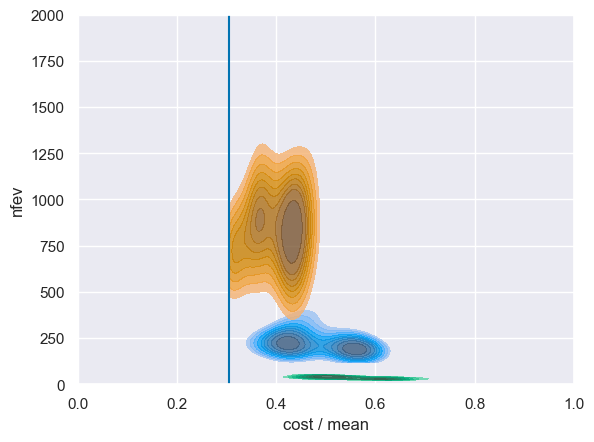

In [37]:
sns.kdeplot(data = qs[qs['n_towns'] == 7], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ann7, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ls7, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
plt.axvline(brute7['min_cost'] / brute7['mean'])
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
#plt.savefig('./blobs.pdf', bbox_inches = 'tight')

In [38]:
ann6 = extensively_test_classical_method(cost_matrix_6, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann6, 6, brute6);

In [39]:
ls6 = extensively_test_classical_method(cost_matrix_6, solve_tsp_local_search, 1000)
calculate_statistics(ls6, 6, brute6);

(0.0, 2000.0)

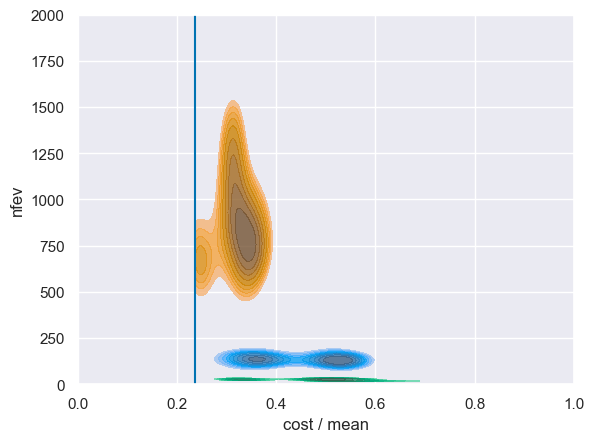

In [40]:
sns.kdeplot(data = qs[qs['n_towns'] == 6], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ann6, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ls6, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
plt.axvline(brute6['min_cost'] / brute6['mean'])
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
#plt.savefig('./blobs.pdf', bbox_inches = 'tight')

In [41]:
ann5 = extensively_test_classical_method(cost_matrix_5, solve_tsp_simulated_annealing, 1000)
calculate_statistics(ann5, 5, brute5);

In [42]:
ls5 = extensively_test_classical_method(cost_matrix_5, solve_tsp_local_search, 1000)
calculate_statistics(ls5, 5, brute5);

(0.0, 2000.0)

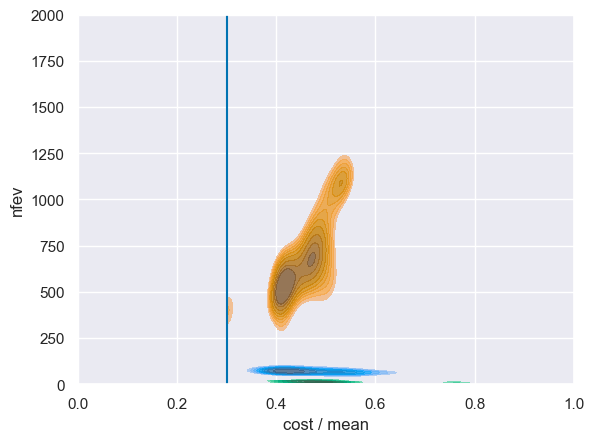

In [43]:
sns.kdeplot(data = qs[qs['n_towns'] == 5], x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ann5, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
sns.kdeplot(data = ls5, x = 'cost / mean', y = 'nfev', fill = True, thresh = 0.5, alpha = 0.8, cut = 0)
plt.axvline(brute5['min_cost'] / brute5['mean'])
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 2000)
#plt.savefig('./blobs.pdf', bbox_inches = 'tight')

<AxesSubplot:xlabel='n_towns', ylabel='nfev'>

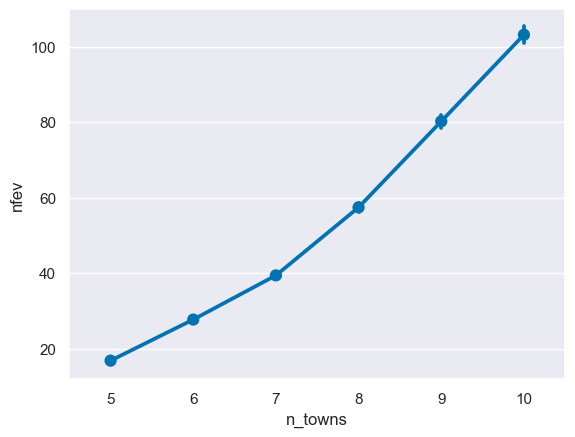

In [45]:
sns.pointplot(data = pd.concat([
        ls5, ls6, ls7, ls8_2, ls9, ls10
    ], keys = [5, 6, 7, 8, 9, 10], names = ['n_towns']).reset_index(),
    x = 'n_towns', y = 'nfev'
)

<AxesSubplot:xlabel='n_towns', ylabel='nfev'>

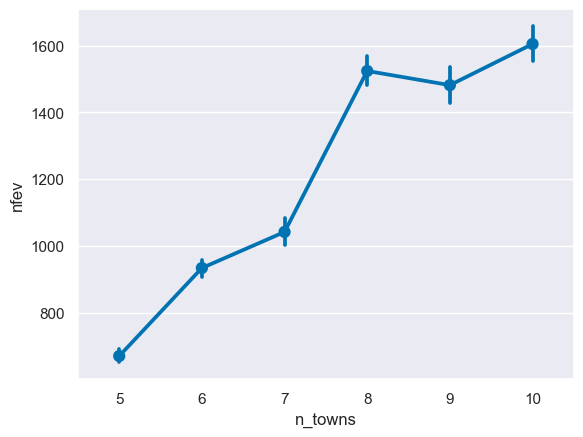

In [46]:
sns.pointplot(data = pd.concat([
        ann5, ann6, ann7, ann8_2, ann9, ann10
    ], keys = [5, 6, 7, 8, 9, 10], names = ['n_towns']).reset_index(),
    x = 'n_towns', y = 'nfev'
)

<AxesSubplot:xlabel='n_towns', ylabel='nfev'>

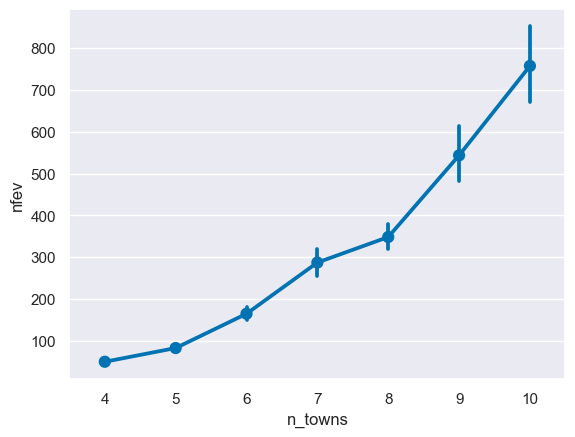

In [ ]:
sns.pointplot(data = qs,
    x = 'n_towns', y = 'nfev'
)

In [47]:
qs_ = qs[['n_towns', 'cost', 'cost / mean', 'nfev', 'percentile_rank', 'nfev * pr']][qs['n_towns'] != 4]

In [48]:
ann = pd.concat([ann5, ann6, ann7, ann8_2, ann9, ann10], names = ['n_towns', 'idx'], keys = range(5, 11)).reset_index()

In [49]:
ls = pd.concat([ls5, ls6, ls7, ls8_2, ls9, ls10], names = ['n_towns', 'idx'], keys = range(5, 11)).reset_index()

In [50]:
from matplotlib.patches import Patch

In [51]:
patchs = [Patch(facecolor = c) for c in sns.color_palette('colorblind')]

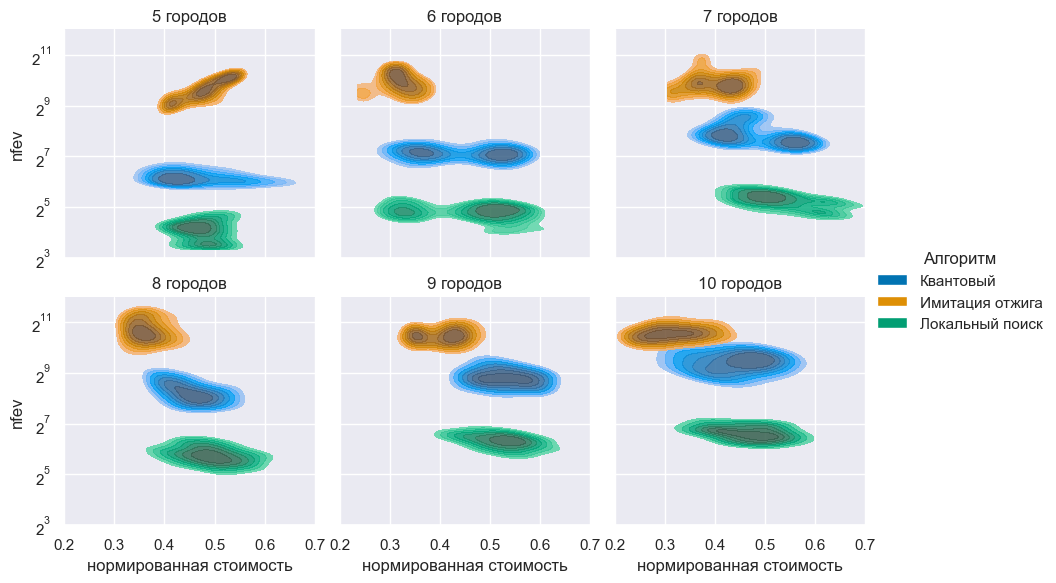

In [52]:
sns.FacetGrid(data = pd.concat([qs_, ann, ls], names = ['Алгоритм'], keys = ['Квантовый', 'Имитация отжига', 'Локальный поиск']).reset_index(), col = 'n_towns', col_wrap = 3, hue = 'Алгоритм').map(sns.kdeplot, 'cost / mean', 'nfev', fill = True, thresh = 0.5, cut = 0, alpha = 0.85, log_scale = (False, 2), levels = 8).set(xlim = (0.2, 0.7), ylim = (8, 4096), xlabel = 'нормированная стоимость').add_legend(legend_data = {'Квантовый': patchs[0], 'Имитация отжига': patchs[1], 'Локальный поиск': patchs[2]}).set_titles('{col_name} городов')
plt.savefig('./blobss.pdf')

In [ ]:
sns.set_palette('colorblind')

In [ ]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

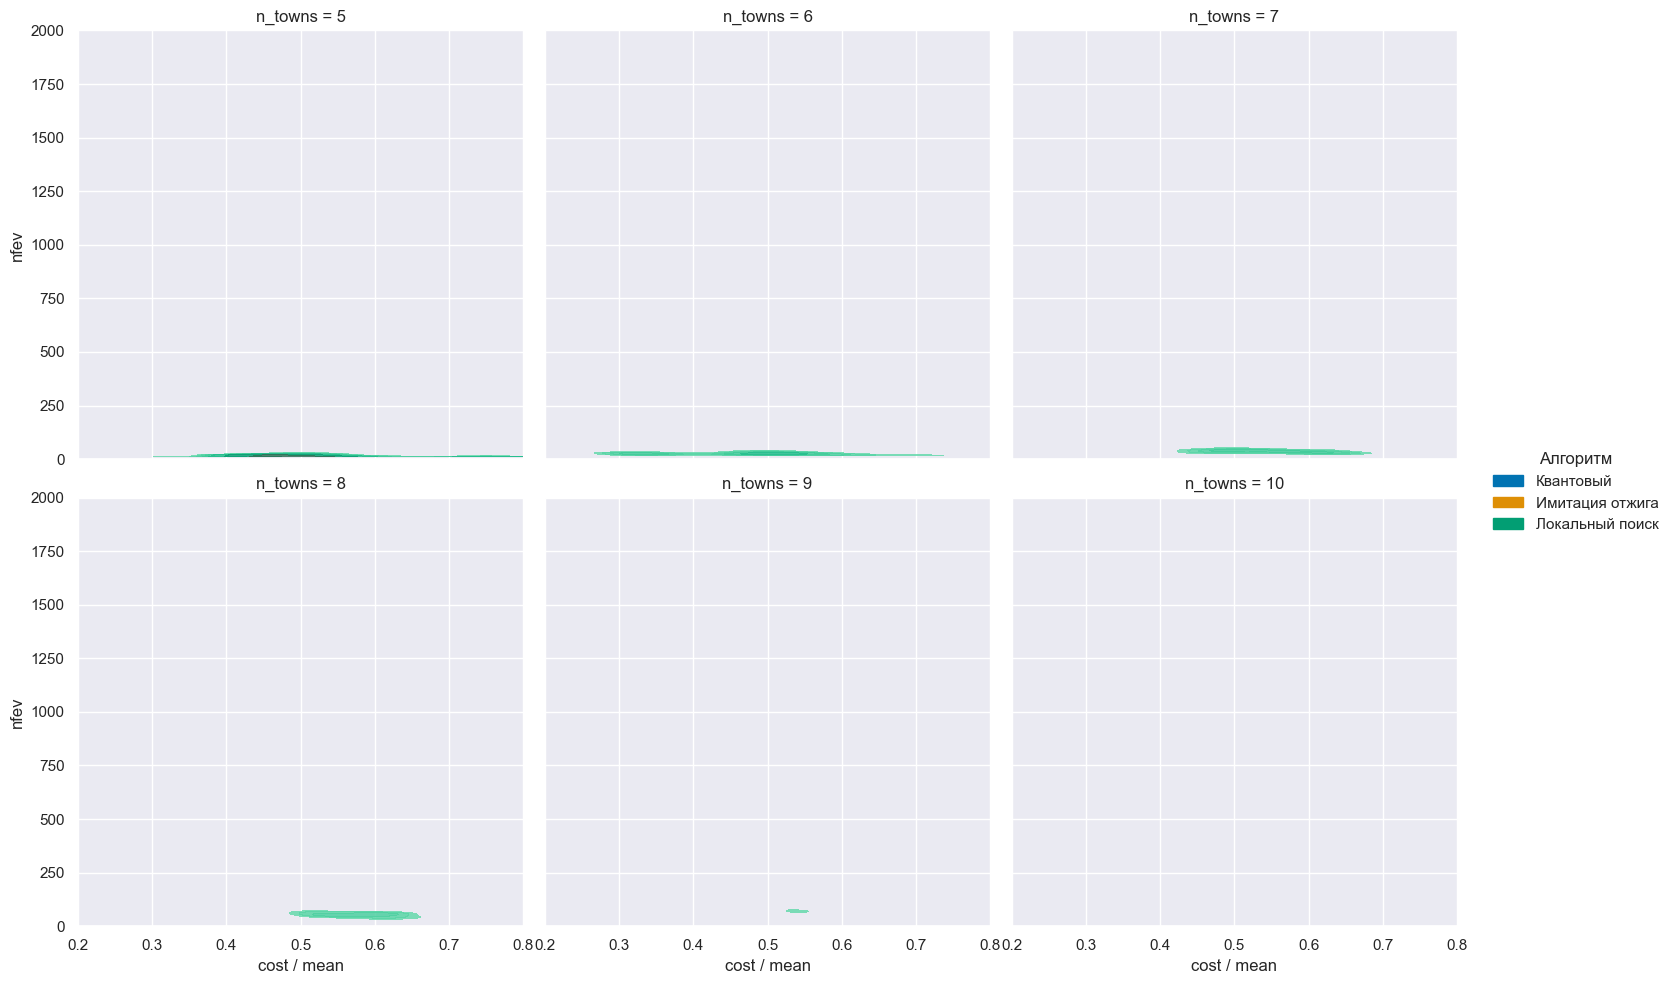

In [ ]:
sns.displot(data = pd.concat([qs_, ann, ls], names = ['Алгоритм'], keys = ['Квантовый', 'Имитация отжига', 'Локальный поиск']).reset_index(), x = 'cost / mean', y = 'nfev', hue = 'Алгоритм', col = 'n_towns', kind = 'kde', col_wrap = 3, fill = True, thresh = 0.5, cut = 0, alpha = 0.85, levels = 8).set(xlim = (0.2, 0.8), ylim = (0, 2000))